## GradientBoostingRegressor

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import optuna


### Data

In [20]:
file_path = 'Data.csv'
cleaned_data = pd.read_csv(file_path, encoding='euc-kr')

features_encoded = cleaned_data.drop(['dbp', 'sbp'],axis=1)
targets_encoded = cleaned_data[['dbp', 'sbp']].reset_index(drop=True)

X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(features_encoded, targets_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)


y_train_dbp = y_train.iloc[:, 0]  # DBP
y_train_sbp = y_train.iloc[:, 1]  # SBP

### GradientBoostingRegressor + Bayesian Optimizer

In [21]:
def objective(trial, X_train, y_train, X_test, y_test):
   
    n_estimators = trial.suggest_int('n_estimators', 1000, 5000)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 30)

    model = GradientBoostingRegressor(n_estimators=n_estimators,
                                      learning_rate=learning_rate,
                                      max_depth=max_depth,
                                      random_state=2,
                                      loss='absolute_error')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    
    return mse

def optimize_hyperparameters(X_train, y_train, X_test, y_test):
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=40)
    return study.best_params

#### DBP

In [22]:
y_test_dbp = y_test.iloc[:, 0] # DBP

best_params_dbp = optimize_hyperparameters(X_train_encoded, y_train_dbp, X_test_encoded, y_test_dbp)
print("Best parameters for DBP:", best_params_dbp)

model_dbp = GradientBoostingRegressor(**best_params_dbp, random_state=2, loss='absolute_error')
model_dbp.fit(X_train_encoded, y_train_dbp)
y_dbp_pred = model_dbp.predict(X_test_encoded)

mse_dbp = mean_squared_error(y_test_dbp, y_dbp_pred)
rmse_dbp = np.sqrt(mse_dbp)
print("DBP Mean Squared Error (MSE):", mse_dbp)
print("DBP Root Mean Squared Error (RMSE):", rmse_dbp)

[I 2024-02-07 14:06:06,000] A new study created in memory with name: no-name-a32b4c39-7370-4c14-9a68-45a1f1c7865f
[I 2024-02-07 14:06:11,329] Trial 0 finished with value: 82.87296029508062 and parameters: {'n_estimators': 4016, 'learning_rate': 0.01940381143448357, 'max_depth': 4}. Best is trial 0 with value: 82.87296029508062.
[I 2024-02-07 14:06:21,766] Trial 1 finished with value: 75.67408045031853 and parameters: {'n_estimators': 3999, 'learning_rate': 0.002470719890211436, 'max_depth': 17}. Best is trial 1 with value: 75.67408045031853.
[I 2024-02-07 14:06:30,169] Trial 2 finished with value: 75.89189224464172 and parameters: {'n_estimators': 3225, 'learning_rate': 0.028471663735204662, 'max_depth': 22}. Best is trial 1 with value: 75.67408045031853.
[I 2024-02-07 14:06:40,171] Trial 3 finished with value: 78.14838917543189 and parameters: {'n_estimators': 3893, 'learning_rate': 0.01716691743996452, 'max_depth': 11}. Best is trial 1 with value: 75.67408045031853.
[I 2024-02-07 14:

Best parameters for DBP: {'n_estimators': 1714, 'learning_rate': 0.00159788836584835, 'max_depth': 30}
DBP Mean Squared Error (MSE): 67.14308518720942
DBP Root Mean Squared Error (RMSE): 8.1940884293013


#### SBP

In [23]:
y_test_sbp = y_test.iloc[:, 1] # SBP

best_params_sbp = optimize_hyperparameters(X_train_encoded, y_train_sbp, X_test_encoded, y_test_sbp)
print("Best parameters for SBP:", best_params_sbp)

model_sbp = GradientBoostingRegressor(**best_params_sbp, random_state=2, loss='absolute_error')
model_sbp.fit(X_train_encoded, y_train_sbp)
y_sbp_pred = model_sbp.predict(X_test_encoded)

mse_sbp = mean_squared_error(y_test_sbp, y_sbp_pred)
rmse_sbp = np.sqrt(mse_sbp)
print("SBP Mean Squared Error (MSE):", mse_sbp)
print("SBP Root Mean Squared Error (RMSE):", rmse_sbp)

[I 2024-02-07 14:10:23,074] A new study created in memory with name: no-name-5276b5bc-613a-431c-8623-a5aaee51fc73
[I 2024-02-07 14:10:27,969] Trial 0 finished with value: 142.67580100877402 and parameters: {'n_estimators': 1910, 'learning_rate': 0.0015047650151175367, 'max_depth': 9}. Best is trial 0 with value: 142.67580100877402.
[I 2024-02-07 14:10:37,801] Trial 1 finished with value: 138.92129903762756 and parameters: {'n_estimators': 4849, 'learning_rate': 0.011816365324514237, 'max_depth': 6}. Best is trial 1 with value: 138.92129903762756.
[I 2024-02-07 14:10:42,260] Trial 2 finished with value: 140.74400915704499 and parameters: {'n_estimators': 1793, 'learning_rate': 0.0021589520226932136, 'max_depth': 19}. Best is trial 1 with value: 138.92129903762756.
[I 2024-02-07 14:10:52,604] Trial 3 finished with value: 149.82937590009018 and parameters: {'n_estimators': 4331, 'learning_rate': 0.06327276755422695, 'max_depth': 21}. Best is trial 1 with value: 138.92129903762756.
[I 2024

Best parameters for SBP: {'n_estimators': 3376, 'learning_rate': 0.001284550259341372, 'max_depth': 28}
SBP Mean Squared Error (MSE): 122.17498165299487
SBP Root Mean Squared Error (RMSE): 11.05327922622942


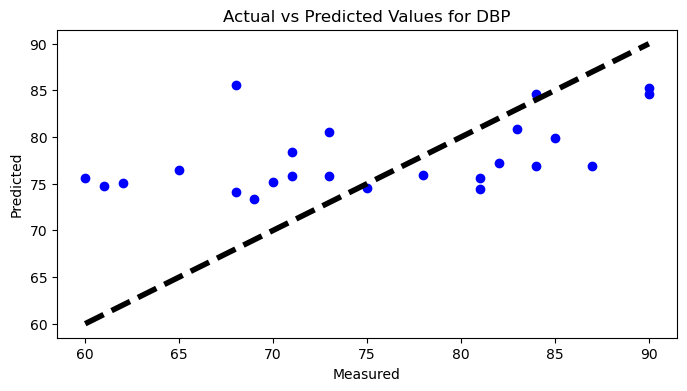

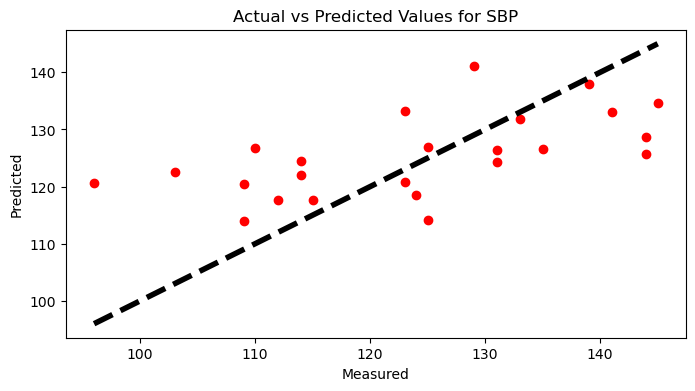

In [24]:
# DBP
plt.figure(figsize=(8,4))
plt.scatter(y_test_dbp, y_dbp_pred, color='blue')
plt.plot([y_test_dbp.min(), y_test_dbp.max()], [y_test_dbp.min(), y_test_dbp.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for DBP')
plt.show()

# SBP
plt.figure(figsize=(8,4))
plt.scatter(y_test_sbp, y_sbp_pred, color='red')
plt.plot([y_test_sbp.min(), y_test_sbp.max()], [y_test_sbp.min(), y_test_sbp.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for SBP')
plt.show()

#### K-FOLD cross validation

In [25]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

mse_scores_dbp = []
mse_scores_sbp = []

for train_index, test_index in kf.split(features_encoded):
    X_train, X_test = features_encoded.iloc[train_index], features_encoded.iloc[test_index]
    y_train, y_test = targets_encoded.iloc[train_index], targets_encoded.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    y_train_dbp = y_train.iloc[:, 0]
    model_dbp = GradientBoostingRegressor(**best_params_dbp, random_state=42, loss='absolute_error')
    model_dbp.fit(X_train_scaled, y_train_dbp)
    y_dbp_pred = model_dbp.predict(X_test_scaled)
    mse_scores_dbp.append(mean_squared_error(y_test.iloc[:, 0], y_dbp_pred))

    y_train_sbp = y_train.iloc[:, 1]
    model_sbp = GradientBoostingRegressor(**best_params_sbp, random_state=42, loss='absolute_error')
    model_sbp.fit(X_train_scaled, y_train_sbp)
    y_sbp_pred = model_sbp.predict(X_test_scaled)
    mse_scores_sbp.append(mean_squared_error(y_test.iloc[:, 1], y_sbp_pred))

avg_mse_dbp = np.mean(mse_scores_dbp)
avg_rmse_dbp = np.sqrt(avg_mse_dbp)
avg_mse_sbp = np.mean(mse_scores_sbp)
avg_rmse_sbp = np.sqrt(avg_mse_sbp)

print(f"DBP 평균 MSE: {avg_mse_dbp}, 평균 RMSE: {avg_rmse_dbp}")
print(f"SBP 평균 MSE: {avg_mse_sbp}, 평균 RMSE: {avg_rmse_sbp}")